# Digital content and entertainment

## Imdb sentiment analysis

### Importing and analysing the dataset

In [1]:
from keras.datasets import imdb
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import pad_sequences
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.callbacks import EarlyStopping
import string

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000, index_from = 3) #select top 10000 frequent words

In [3]:
print(f"Length of X_train {len(X_train)}")
print(f"Length of X_test {len(X_test)}")

Length of X_train 25000
Length of X_test 25000


### Sequence adding

In [4]:
max_review_length = 500
X_train = pad_sequences(X_train, maxlen = max_review_length)
X_test = pad_sequences(X_test, maxlen = max_review_length)

### Features and labels

In [5]:
print(f"shape of X_train {X_train.shape}")
print(f"shape of y_train {y_train.shape}")
print(f"shape of X_test {X_test.shape}")
print(f"shape of y_test {y_test.shape}")

shape of X_train (25000, 500)
shape of y_train (25000,)
shape of X_test (25000, 500)
shape of y_test (25000,)


In [6]:
X_train[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1,  785,  189,  438,   47,
        110,  142,    7,    6, 7475,  120,    4,  236,  378,    7,  153,
         19,   87,  108,  141,   17, 1004,    5,    2,  883,    2,   23,
          8,    4,  136,    2,    2,    4, 7475,   43, 1076,   21, 1407,
        419,    5, 5202,  120,   91,  682,  189, 2818,    5,    9, 1348,
         31,    7,    4,  118,  785,  189,  108,  126,   93,    2,   16,
        540,  324,   23,    6,  364,  352,   21,   14,    9,   93,   56,
         18,   11,  230,   53,  771,   74,   31,   34,    4, 2834,    7,
          4,   22,    5,   14,   11,  471,    9,    2,   34,    4,  321,
        487,    5,  116,   15, 6584,    4,   22,   

In [7]:
y_train[0]

1

### Decoding

In [8]:
word_dict = imdb.get_word_index()
word_dict = { key:(value+3) for key, value in word_dict.items() }
word_dict[''] = 0                                             
word_dict['>'] = 1
word_dict['?'] = 2

In [9]:
a = []
for key, value in word_dict.items():
    a.append(value)

In [10]:
print(sorted(a))

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [11]:
type(word_dict)

dict

In [12]:
'is' in word_dict

True

In [13]:
reverse_word_dict = { value:key for key, value in word_dict.items() }

In [14]:
type(reverse_word_dict)

dict

In [15]:
len(word_dict)

88587

In [18]:
i = 9
print(' '.join(reverse_word_dict[id] for id in X_train[i]))
print("\nReview: ",'Positive' if y_train[i] == 1 else 'Negative')

                                                                                                                                                                                                                                                                                                                                                                                  > this movie has many problem associated with it that makes it come off like a low budget class project from someone in film school i have to give it credit on its ? though many times throughout the movie i found myself laughing hysterically it was so bad at times that it was comical which made it a fun watch br br if you're looking for a low grade slasher movie with a twist of psychological horror and a dash of campy ? then pop a bowl of popcorn invite some friends over and have some fun br br i agree with other comments that the sound is very bad dialog is next to impossible to follow much of the time and the soundtrack 

In [19]:
y = pd.Series(y_train)

In [20]:
y.value_counts()

1    12500
0    12500
dtype: int64

### Model building using NN

In [21]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(10000, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 16)                256016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
call_backs = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=100)
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, callbacks=call_backs, verbose=0)

In [23]:
_, train_accuracy = model.evaluate(X_train, y_train, verbose=1)
_, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_accuracy, test_accuracy))

782/782 [==============================] - 3s 4ms/step - loss: 1.2279 - accuracy: 0.8720
Train: 1.000, Test: 0.872


In [24]:
y_pred = model.predict(X_test)

782/782 [==============================] - 3s 4ms/step


### Analysis

In [31]:
i = 4
print(' '.join(reverse_word_dict[id] for id in X_test[i]))
print("\nActual Review: ",'Positive' if y_test[i] == 1 else 'Negative')
print("\nPredicted Review: ",'Positive' if y_pred[i] == 1 else 'Negative')

                                                                                                                                                                                                                                                                                                                                                                                                        > like some other people wrote i'm a die hard mario fan and i loved this game br br this game starts slightly boring but trust me it's worth it as soon as you start your hooked the levels are fun and ? they will hook you ? your mind turns to ? i'm not kidding this game is also ? and is beautifully done br br to keep this spoiler free i have to keep my mouth shut about details but please try this game it'll be worth it br br story 9 9 action 10 1 it's that good ? 10 attention ? 10 average 10

Actual Review:  Positive

Predicted Review:  Positive


In [39]:
def review(text):
    text = text.lower()
    token = text.split()
    
    test = []
    for w in token:
        if w in word_dict:
            test.append(word_dict[w])
    
    test = pad_sequences([test], maxlen = max_review_length)
    result = model.predict(np.array([test][0]))[0][0]
    print("\nReview: ",'Positive' if result > 0.8 else 'Negative')

In [40]:
txt = input("Enter a review: ")
review(txt)

Enter a review: it is so boring to sit in this movie
1/1 [==============================] - 0s 40ms/step

Review:  Negative


In [43]:
txt = input("Enter a review: ")
review(txt)

Enter a review: worth watching
1/1 [==============================] - 0s 35ms/step

Review:  Positive


# Social Media analytics

## News-Headlines-Dataset-For-Sarcasm-Detection

In [57]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
import re,string
import seaborn as sns
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU
import tensorflow as tf
from wordcloud import WordCloud

### Reading the data

In [2]:
data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
data.head(5)

is_sarcastic                                           headline  \
0             1  thirtysomething scientists unveil doomsday clo...   
1             0  dem rep. totally nails why congress is falling...   
2             0  eat your veggies: 9 deliciously different recipes   
3             1  inclement weather prevents liar from getting t...   
4             1  mother comes pretty close to using word 'strea...   

                                        article_link  
0  https://www.theonion.com/thirtysomething-scien...  
1  https://www.huffingtonpost.com/entry/donna-edw...  
2  https://www.huffingtonpost.com/entry/eat-your-...  
3  https://local.theonion.com/inclement-weather-p...  
4  https://www.theonion.com/mother-comes-pretty-c...

In [3]:
data = data.drop(['article_link'], axis = 1)

In [4]:
data.head(5)

is_sarcastic                                           headline
0             1  thirtysomething scientists unveil doomsday clo...
1             0  dem rep. totally nails why congress is falling...
2             0  eat your veggies: 9 deliciously different recipes
3             1  inclement weather prevents liar from getting t...
4             1  mother comes pretty close to using word 'strea...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


In [6]:
data.isna().sum()

is_sarcastic    0
headline        0
dtype: int64

In [7]:
data.describe(include = 'object')

headline
count                                               28619
unique                                              28503
top     'no way to prevent this,' says only nation whe...
freq                                                   12

In [8]:
data.shape

(28619, 2)

<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

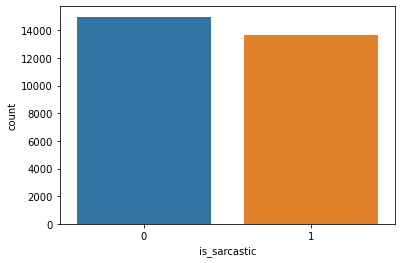

In [9]:
sns.countplot(x = 'is_sarcastic', data = data)

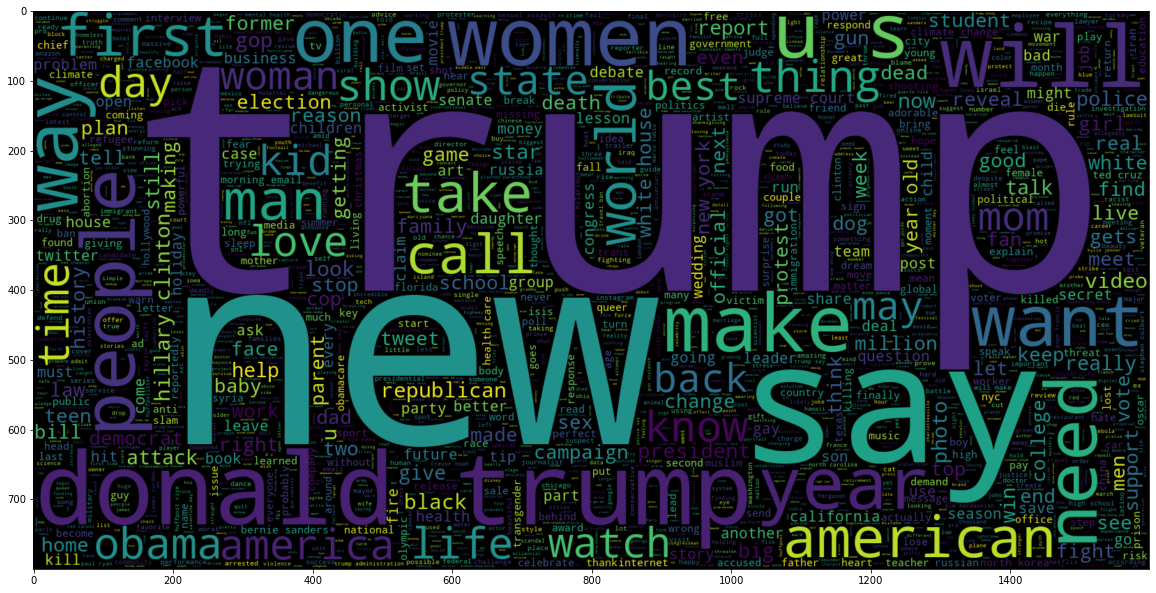

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

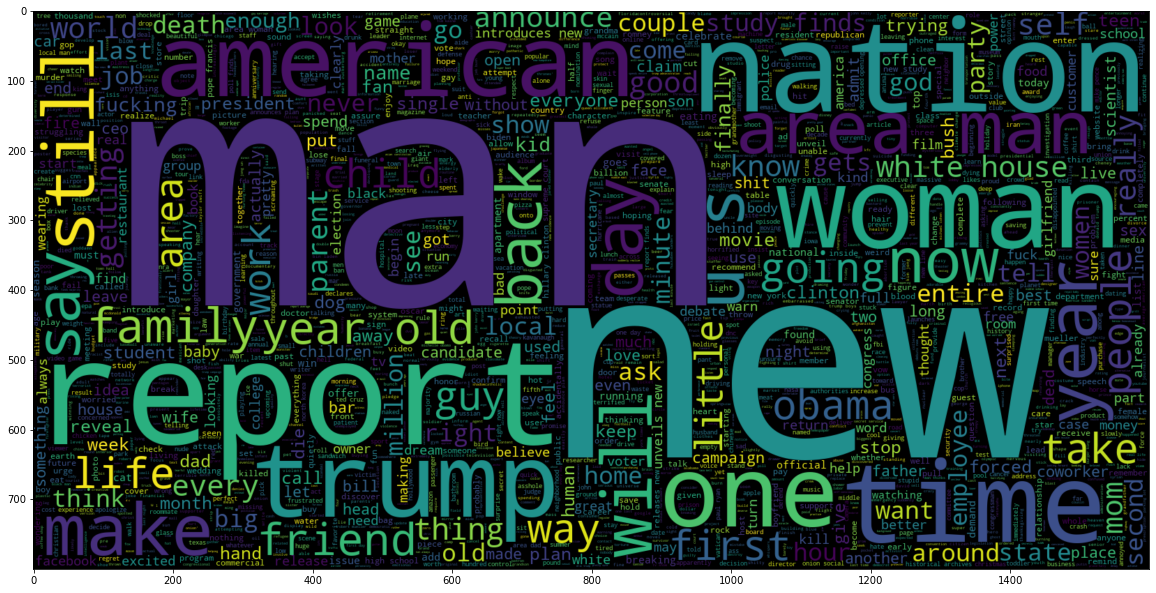

In [11]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

In [12]:
data['Length'] = [len(i) for i in data.headline]

In [13]:
data['word_indices'] = [[(word.start(), word.end()-1) for word in re.finditer(r'\S+', line)] for line in data.headline]

In [14]:
data.head(5)

is_sarcastic                                           headline  Length  \
0             1  thirtysomething scientists unveil doomsday clo...      61   
1             0  dem rep. totally nails why congress is falling...      79   
2             0  eat your veggies: 9 deliciously different recipes      49   
3             1  inclement weather prevents liar from getting t...      52   
4             1  mother comes pretty close to using word 'strea...      61   

                                        word_indices  
0  [(0, 14), (16, 25), (27, 32), (34, 41), (43, 4...  
1  [(0, 2), (4, 7), (9, 15), (17, 21), (23, 25), ...  
2  [(0, 2), (4, 7), (9, 16), (18, 18), (20, 30), ...  
3  [(0, 8), (10, 16), (18, 25), (27, 30), (32, 35...  
4  [(0, 5), (7, 11), (13, 18), (20, 24), (26, 27)...

### Data cleaning

In [15]:
stopwords = set(stopwords.words('english'))

In [16]:
data['headline']

0        thirtysomething scientists unveil doomsday clo...
1        dem rep. totally nails why congress is falling...
2        eat your veggies: 9 deliciously different recipes
3        inclement weather prevents liar from getting t...
4        mother comes pretty close to using word 'strea...
                               ...                        
28614         jews to celebrate rosh hashasha or something
28615    internal affairs investigator disappointed con...
28616    the most beautiful acceptance speech this week...
28617    mars probe destroyed by orbiting spielberg-gat...
28618                   dad clarifies this not a food stop
Name: headline, Length: 28619, dtype: object

In [17]:
pattern = '[^A-Za-z]+'
data.headline = data.headline.apply(lambda s : re.sub(pattern," ",s))

In [18]:
data.headline = data.headline.apply(lambda s: s.lower())

In [19]:
data.headline = data.headline.apply(lambda s: s.strip())

In [20]:
data.headline = data.headline.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]))

In [21]:
words = []
for i in data.headline.values:
    words.append(i.split())
words[:5]

[['thirtysomething',
  'scientists',
  'unveil',
  'doomsday',
  'clock',
  'hair',
  'loss'],
 ['dem',
  'rep',
  'totally',
  'nails',
  'congress',
  'falling',
  'short',
  'gender',
  'racial',
  'equality'],
 ['eat', 'veggies', 'deliciously', 'different', 'recipes'],
 ['inclement', 'weather', 'prevents', 'liar', 'getting', 'work'],
 ['mother',
  'comes',
  'pretty',
  'close',
  'using',
  'word',
  'streaming',
  'correctly']]

Features = data['headline'] \
labels = data['is_sarchastic']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(data.headline,data.is_sarcastic, test_size = 0.3 , random_state = 0)

In [23]:
max_features = 35000
maxlen = 200

In [24]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(tokenized_train, maxlen=maxlen)

In [25]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = pad_sequences(tokenized_test, maxlen=maxlen)

In [26]:
word_index = tokenizer.word_index

In [27]:
len(word_index)

21999

In [28]:
#vocabulary
word_index

{'trump': 1,
 'new': 2,
 'man': 3,
 'report': 4,
 'one': 5,
 'year': 6,
 'woman': 7,
 'day': 8,
 'area': 9,
 'time': 10,
 'u': 11,
 'donald': 12,
 'says': 13,
 'first': 14,
 'obama': 15,
 'old': 16,
 'get': 17,
 'women': 18,
 'world': 19,
 'like': 20,
 'life': 21,
 'people': 22,
 'nation': 23,
 'house': 24,
 'make': 25,
 'white': 26,
 'back': 27,
 'clinton': 28,
 'still': 29,
 'family': 30,
 'could': 31,
 'way': 32,
 'americans': 33,
 'gop': 34,
 'study': 35,
 'would': 36,
 'black': 37,
 'american': 38,
 'years': 39,
 'bill': 40,
 'really': 41,
 'last': 42,
 'show': 43,
 'finds': 44,
 'know': 45,
 'home': 46,
 'president': 47,
 'state': 48,
 'watch': 49,
 'going': 50,
 'mom': 51,
 'school': 52,
 'best': 53,
 'video': 54,
 'death': 55,
 'good': 56,
 'every': 57,
 'police': 58,
 'things': 59,
 'america': 60,
 'big': 61,
 'child': 62,
 'hillary': 63,
 'campaign': 64,
 'right': 65,
 'high': 66,
 'party': 67,
 'parents': 68,
 'getting': 69,
 'love': 70,
 'say': 71,
 'work': 72,
 'take': 73,

### Glove embeddings

In [29]:
embeddings_index = {}

f = open('glove.6B.200d.txt',encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

embeddings_index

{'the': array([-7.1549e-02,  9.3459e-02,  2.3738e-02, -9.0339e-02,  5.6123e-02,
         3.2547e-01, -3.9796e-01, -9.2139e-02,  6.1181e-02, -1.8950e-01,
         1.3061e-01,  1.4349e-01,  1.1479e-02,  3.8158e-01,  5.4030e-01,
        -1.4088e-01,  2.4315e-01,  2.3036e-01, -5.5339e-01,  4.8154e-02,
         4.5662e-01,  3.2338e+00,  2.0199e-02,  4.9019e-02, -1.4132e-02,
         7.6017e-02, -1.1527e-01,  2.0060e-01, -7.7657e-02,  2.4328e-01,
         1.6368e-01, -3.4118e-01, -6.6070e-02,  1.0152e-01,  3.8232e-02,
        -1.7668e-01, -8.8153e-01, -3.3895e-01, -3.5481e-02, -5.5095e-01,
        -1.6899e-02, -4.3982e-01,  3.9004e-02,  4.0447e-01, -2.5880e-01,
         6.4594e-01,  2.6641e-01,  2.8009e-01, -2.4625e-02,  6.3302e-01,
        -3.1700e-01,  1.0271e-01,  3.0886e-01,  9.7792e-02, -3.8227e-01,
         8.6552e-02,  4.7075e-02,  2.3511e-01, -3.2127e-01, -2.8538e-01,
         1.6670e-01, -4.9707e-03, -6.2714e-01, -2.4904e-01,  2.9713e-01,
         1.4379e-01, -1.2325e-01, -5.8178e-0

In [32]:
all_embs = np.stack(embeddings_index.values())

C:\Users\arunv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [33]:
all_embs.shape

(400000, 200)

In [34]:
nb_words = min(max_features, len(word_index))

In [35]:
nb_words

21999

In [36]:
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

In [37]:
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: 
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
        embedding_matrix[i] = embedding_vector

In [38]:
embedding_matrix.shape

(21999, 200)

### Building bidirectional LSTM sequential NN model

In [40]:
model = Sequential()
model.add(Embedding(nb_words, output_dim=embed_size, weights=[embedding_matrix], input_length=200, trainable=True))
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['acc'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 200)          4399800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 4,736,953
Trainable params: 4,736,953
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x_train, y_train, batch_size = 30 , validation_data = (X_test,y_test) , epochs = 1)

105/668 [===>..........................] - ETA: 23:10 - loss: 0.3921 - acc: 0.8279

KeyboardInterrupt: 

In [44]:
print("Accuracy: " , model.evaluate(X_test,y_test)[1]*100)

269/269 [==============================] - 100s 371ms/step - loss: 0.4700 - acc: 0.7886
Accuracy:  78.86093854904175


In [45]:
pred = np.round(model.predict(X_test))
pred[:5]

269/269 [==============================] - 81s 300ms/step


array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [46]:
y_test[:5]

151      1
17228    0
4725     1
4258     0
12250    1
Name: is_sarcastic, dtype: int64

### Classification report

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [48]:
print(classification_report(y_test, pred, target_names = ['Not Sarcastic','Sarcastic']))

               precision    recall  f1-score   support

Not Sarcastic       0.80      0.81      0.80      4560
    Sarcastic       0.78      0.77      0.77      4026

     accuracy                           0.79      8586
    macro avg       0.79      0.79      0.79      8586
 weighted avg       0.79      0.79      0.79      8586



In [49]:
cm = confusion_matrix(y_test,pred)
cm

array([[3689,  871],
       [ 944, 3082]], dtype=int64)

<AxesSubplot:>

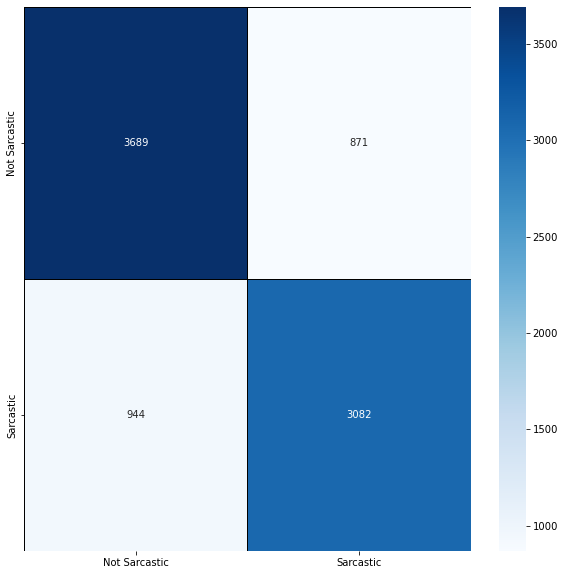

In [50]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic'] , columns = ['Not Sarcastic','Sarcastic'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic'] , yticklabels = ['Not Sarcastic','Sarcastic'])